# Исследование компьютерных игр

#### Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы

##### Цель проекта: выявить определяющие успешность игры закономерности.

##### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Задачи

1. Проанализировать и преобработать данные
2. Выявить актуальный период
3. Выявить успешные платформы, успешные жанры
4. Оценить степень влияния оценок пользователей и критиков на продажи игр
5. Составить портрет пользователя каждого региона
6. Проверить гипотезы о равенстве оценок пользователей для двух разных платформ и двух разных жанров
7. Сформулировать общий вывод

### 1. ОБЗОР ОБЩЕЙ ИНФОРМАЦИИ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
df=pd.read_csv('games.csv')

In [3]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df['Name'].value_counts()

Need for Speed: Most Wanted      12
Ratatouille                       9
FIFA 14                           9
LEGO Marvel Super Heroes          9
Madden NFL 07                     9
                                 ..
Mugen Souls                       1
Fear Factor: Unleashed            1
SimEarth: The Living Planet       1
Namco Museum DS                   1
Jikkyou Powerful Pro Yakyuu 3     1
Name: Name, Length: 11559, dtype: int64

In [7]:
# изучим пропуски
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

##### Вывод

Представлена информация о продажах 11559 играх Северной Америки, Японии, Европы и остальных странах за период 1980-2016гг : названия игр, платформа, год издания, жанр, продажи, оценки пользователей и критиков, рейтинги организаций. 
Всего 16715 строк (некоторые игры представлены на нескольких платформах). В данных есть пропуски, которые необходимо преобработать: название игры и жанр (2 пропуска), год выпуска (1.6%), оценки критиков (51%), оценки пользователей (40%), рейтинг (40%). Также из предварительного осмотра инфо видно что больший доход приходится на рынок Северной Америки, затем Европы и Японии.
Для того чтобы приступить к анализу информации необходимо пребработать данные.

### 2. ПРЕОБРАБОТКА ДАННЫХ

In [8]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [9]:
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [10]:
# посмотрим у каких платформ и сколько пропущены назватия игр
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
# посмотрим у каких платформ и сколько пропущены назватия жанров
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# удалим эти 2 строки (из 16715 строк удаление 2-х строк не окажет влияния на анализ данных
# и к тому же данные очень страрые - "игры-раритет")
df.dropna(subset=['name'],inplace=True)


In [13]:
# посмотрим пропуски у года издания игры
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В инфо о годе выпуске игры всего 269 пропуска. Удалим данные строки

In [14]:
df.dropna(subset=['year_of_release'],inplace=True)

In [15]:

df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [16]:
#пропуски у инфо по оценке критиков
df[df['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Осталось рассмотреть пропуски пропуски в оценке критиков, оценке пользователей и рейтинг от организаций.
Как видно из таблицы выше: нет какой либо закономерности в пропусках (пропуски у разных платформ, игр разного года выпуск, разных жанров) . В таблице нет инфо об издателях. Скорее всего определенные издатели на некоторые игры не предоставили инфо об оценках и рейтинге.
Данные пропуски заменю на "-999". При дальнейшем анализе будем отсекать инфо меньше 0

In [17]:
df['critic_score']=df['critic_score'].fillna(-999)

In [18]:
df['user_score']=df['user_score'].fillna(-999)

In [19]:
df['rating']=df['rating'].fillna("-999")

In [20]:
# проверяем
df.isna().mean()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

In [21]:
# посмотрим типы данных
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Изучив типы данных: необходимо привести год выпуска игры к целочисленному значению и оценку пользователей изенить тип object на float

Посмотрим как оцениваются игры пользователями, критиками и организациями

In [22]:
df['critic_score'].value_counts()

-999.0    8461
 70.0      252
 71.0      248
 75.0      240
 80.0      235
          ... 
 29.0        3
 20.0        3
 21.0        1
 13.0        1
 17.0        1
Name: critic_score, Length: 82, dtype: int64

In [23]:
df['user_score'].value_counts()

-999    6605
tbd     2376
7.8      322
8        285
8.2      276
        ... 
0.2        2
1.9        2
1.3        2
9.7        1
0          1
Name: user_score, Length: 97, dtype: int64

Среди оценок пользователей есть оценка tbd (to be determinate); т.е оценки еще нет. Чаще всего такая оценка у игр которые были анонсированы, но еще не выпущены. Заменим tbd на -999

In [24]:
df.loc[df['user_score']=='tbd','user_score']=-999

In [25]:
df['user_score'].value_counts()

-999    8981
7.8      322
8        285
8.2      276
8.3      252
        ... 
0.3        2
1          2
0.5        2
0          1
9.7        1
Name: user_score, Length: 96, dtype: int64

In [26]:
df['rating'].value_counts()

-999    6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Данные по оценкам пользователей и распознаны как строки - переведем данные в числовые данные. Также переведем в целочисленные данные год выпуска


In [27]:
df['year_of_release']=df['year_of_release'].astype(int)

In [28]:
df['user_score']=df['user_score'].astype(float)

In [29]:
df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [30]:
# посчитаем суммарные продажи
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [31]:
df['sales']=df[['na_sales', 'eu_sales','jp_sales', 'other_sales']].sum(axis=1)

In [32]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999.0,-999.0,-999,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999.0,-999.0,-999,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-999.0,-999.0,-999,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-999.0,-999.0,-999,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-999.0,-999.0,-999,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-999.0,-999.0,-999,0.01


### ВЫВОД

В результате преобработки данных привели к нижнему регистру названия столбцов, заполнили пропуски в оценках и рейтинге на -999(при дальнейшем аналице будет делать срез данных >0), извлекли год выпуска из названия игр и заполнили пропуски, остальные пропуски в годе издания удалили. Изменили тип данных.

## 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

##### Число игр за период 1980-2016гг

In [33]:
#  сгруппируем таблицу по годам и посмотрим количество игр
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Text(0.5, 1.0, 'Динамика производства игр за период 1980-2016 гг')

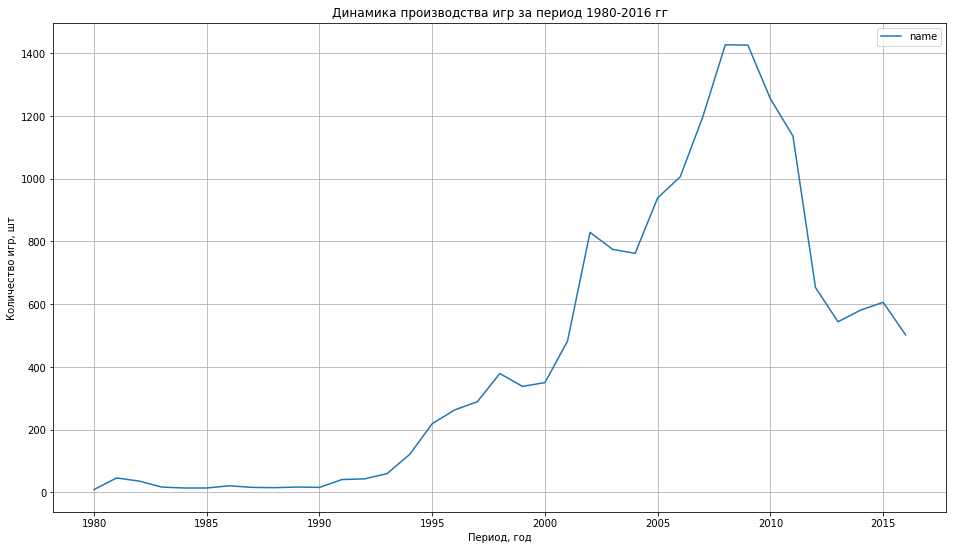

In [34]:
# построим график динамики издательства игр за периаод 1980-2016 гг (без учета игр где пропущен год вывпуска)
pd.pivot_table(df[df['year_of_release']>0],index=['year_of_release'],values=['name'],\
                             aggfunc='count').plot(figsize=(16,9),grid=True)

plt.xlabel('Период, год') 
plt.ylabel('Количество игр, шт') 
plt.title('Динамика производства игр за период 1980-2016 гг')

##### Самая первая компьютервная игра появиласть в 1940 году. С тех пор изменились технологии, визуализация игр. Безусловно не стоит анализировать компьютерные игры 80-х годов (наврядли кто нибудь сейчас играет в игры при помощи магнитофона). График интересен тем, что до 2008 года наблюдается повышающаяся динамика производства игр, а после 2009 года снижение. Возможно произошло насыщение игроков (хотя с развитием жанров игр, компьютеризацией населения-должна быть другая картина). Возможно компании перепрофилировались на производство более дорогих игр (виртуальная реальность). Добавим еще график динамоки продаж игр

Text(0.5, 1.0, 'Динамика продаж игр за период 1980-2016 гг')

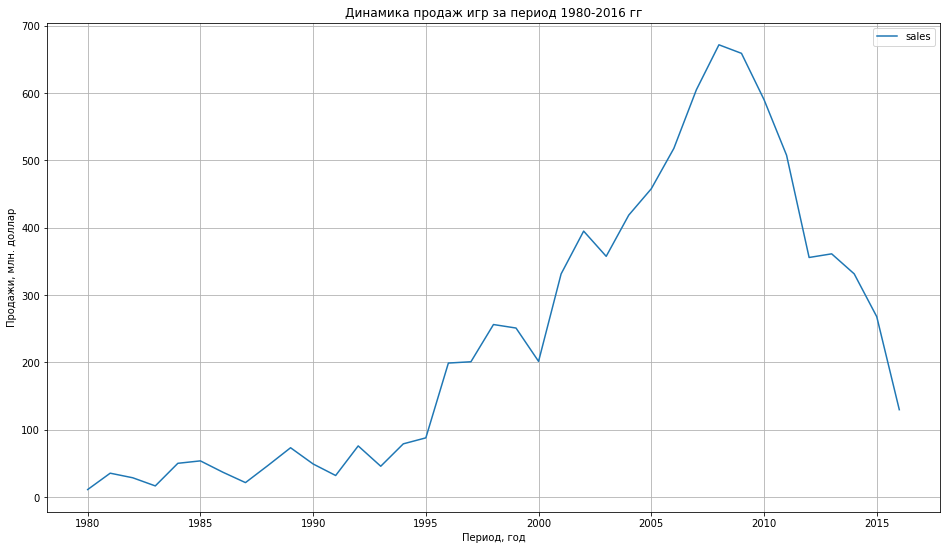

In [35]:
pd.pivot_table(df[df['year_of_release']>0],index=['year_of_release'],values=['sales'],\
                              aggfunc='sum').plot(figsize=(16,9),grid=True)
plt.xlabel('Период, год') 
plt.ylabel('Продажи, млн. доллар') 
plt.title('Динамика продаж игр за период 1980-2016 гг')

#### Динамика та же (рост, а затем падение), только здесь пик продаж приходится на 2008 год. Для того чтобы выяснить какие платформы, жанры сейчас наиболее интересные,можно ли приформировании продуктового портфеля компании ориентироваться на оценки и рейтинги возьмем для анализа период  2008-2016 гг. К сожалению придется отсечь игры у которых неизвестен год выпуска.

Посмотрим жизненный цикл платформ

Text(0.5, 1.0, 'Динамика продаж игр у разных платформ за период 1980-2016 гг ')

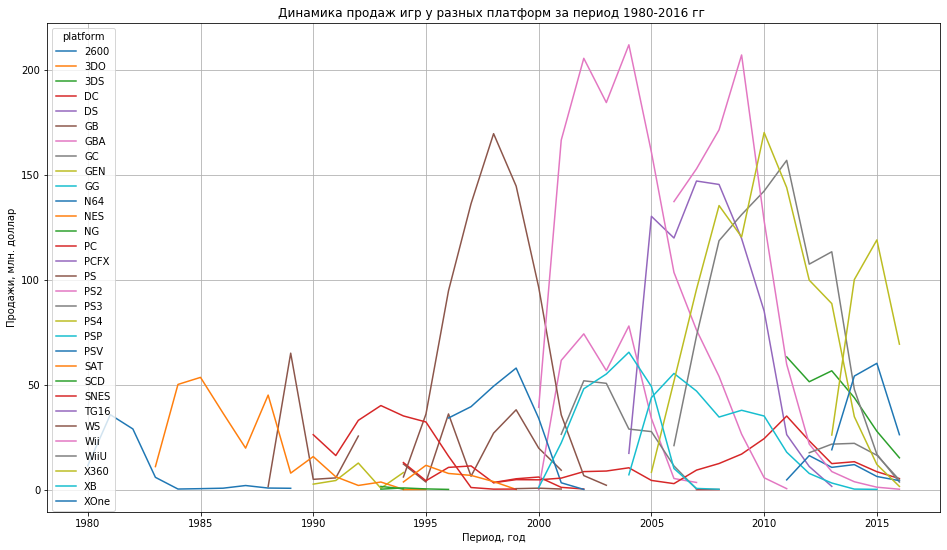

In [36]:
df.pivot_table(index='year_of_release',columns='platform',values='sales',aggfunc='sum').plot(figsize=(16,9),grid=True)
plt.xlabel('Период, год') 
plt.ylabel('Продажи, млн. доллар') 
plt.title('Динамика продаж игр у разных платформ за период 1980-2016 гг ')

Теперь понятно почему с 2006 года намблюдается снижение продаж - не представлены мобильные платформы, которые в настоящее время оттянули львиную долю мирового дохода игр.
Платформ множество. Будет интересно посмотреть среднюю длительность жизненного цикла платформы и какие платформы используются в 2016 году. В 2006 появляются и растут в продажах новые платформы и ухоят с рынка некоторые платформы. Для дальнейшей обработки данных на наш взгляд нужно рассматривать период с 2006 - 2016 гг. Но для начала рассмотрим средний жизненный цикл платформ и рассмотрим продажи у 5 лидирующих платформ

In [37]:
# создадим отдельный столбец для подсчета количества лет
df['year_count']=(df['year_of_release']>0)*1

In [38]:
# создадим сводную таблицу по годам платформ
platform=df.pivot_table(index=['platform','year_of_release'], values='year_count',aggfunc='count').reset_index()

In [39]:
# создадим столбец с количеством лет существования каждой платформы
platform['years_count']=(platform['year_of_release']>0)*1

In [40]:
# формируем сводную таблицу
platform2=platform.pivot_table(index='platform',values='years_count',aggfunc='count').reset_index()

In [41]:

print('минимальное количество лет существования платформы:', platform2['years_count'].min())

минимальное количество лет существования платформы: 1


In [42]:
print('максимальное количество лет существования платформы:', platform2['years_count'].max())

максимальное количество лет существования платформы: 26


In [43]:
print('среднее количество лет существования платформы:',platform2['years_count'].mean())

среднее количество лет существования платформы: 7.67741935483871


In [44]:
print('чаще встечаемое количество лет существования платформы:', platform2['years_count'].mode())

чаще встечаемое количество лет существования платформы: 0    12
dtype: int64


In [45]:
platform2

,platform,years_count
0,2600,10
1,3DO,2
2,3DS,6
3,DC,7
4,DS,11
5,GB,13
6,GBA,8
7,GC,7
8,GEN,5
9,GG,1


##### Минимальный срок 1 год (скорее всего это новая платформа) и максимальный срок - 26 лет. В среднем период от появления платформы до ухода с рынка занимает 7 лет, чаще всего 12 лет

In [46]:
# создадим сводную таблицу для отбора 5 платформ с максимальными продажами
top_platform=df.pivot_table(index='platform',values='sales',aggfunc='sum').sort_values(by='sales',ascending=False).\
                                                              head(5).index

In [47]:
top_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

Text(0.5, 1.0, 'Динамика продаж игр у 5 топовых платформ за период 1980-2016 гг')

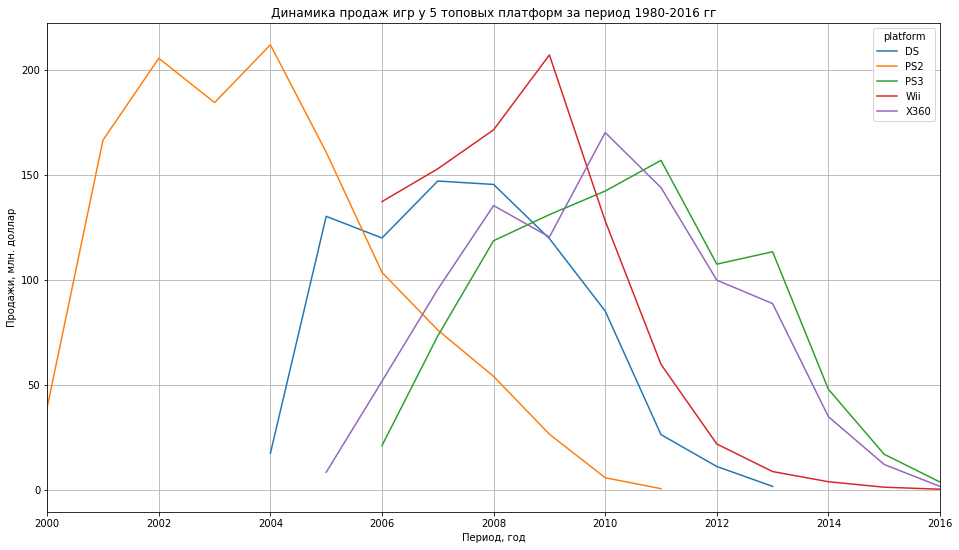

In [48]:
# построим график динамики продаж 5 топовых платформ
(df
    .query('platform in @top_platform')
    .pivot_table(index='year_of_release', columns='platform',values='sales',aggfunc='sum')
    .plot(figsize=(16,9),grid=True)
)
plt.xlim(2000,2016)
plt.xlabel('Период, год') 
plt.ylabel('Продажи, млн. доллар') 
plt.title('Динамика продаж игр у 5 топовых платформ за период 1980-2016 гг')

#### График показывает, что из 5 топовых по продажам платформам - только 3 присутсвуют в 2016 году. Причем пик продаж у одной из этих 3-x платформ приходится на 2009 год , у платформы Х360 пик приходится на 2010 год, у PS3 - 2011. 


In [49]:
# создадим срез данных 2006-2016гг
df_actual=df.query('year_of_release>=2006')

Как видно из предыдущих графиков, все платформы по продажам достигали своего пика в разные периоды. В настоящее время все анализируемы платформы находятся на стадии спада
Посмотрим продажи 10 топ платформ по продажам

In [50]:
# создаем сводную таблицу лидирующих платформ по продажам
top_platform2=df_actual.pivot_table(index='platform',values='sales',aggfunc='sum').sort_values(by='sales',ascending=False).head(10).index

In [51]:
top_platform2

Index(['X360', 'PS3', 'Wii', 'DS', 'PS4', 'PS2', '3DS', 'PSP', 'PC', 'XOne'], dtype='object', name='platform')

Text(0.5, 1.0, 'Продажи 10-топ платформ за период 2006-2016 гг')

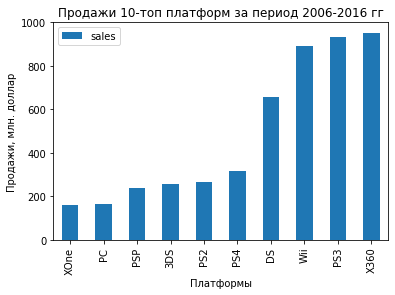

In [52]:
# создаем график 
(df_actual
     .query('platform in @top_platform2')
     .pivot_table(index='platform',values='sales',aggfunc='sum')
     .sort_values('sales')
     .plot(kind='bar')
)
plt.xlabel('Платформы') 
plt.ylabel('Продажи, млн. доллар') 
plt.title('Продажи 10-топ платформ за период 2006-2016 гг')     
 

Мы отсортировали платформы по суммарному доходу за период с 2006-2016 гг. Но это не совсем корректно (возможно платформа недавно вышла на рынок и набирает обороты, или платформа была лидиром до 2006 г. Построим график исходя из средне годовых показателей.

In [53]:
# группируем данные по платвормам и году 
platform_mean=df_actual.pivot_table(index=['platform','year_of_release'], values=['sales','year_count'],aggfunc='sum').reset_index()

In [54]:
# добавляем столбец с количеством уникальных зналений лет
platform_mean['years_count']=(platform_mean['year_of_release']>0)*1

In [55]:
# группируем таблицу platform_mean по платформам с подсчетом суммарных продаж и количеством лет
platform_mean2=platform_mean.pivot_table(index='platform', values=['sales','years_count'],aggfunc='sum').reset_index()

In [56]:
# добавляем столбец - среднегодовая продажа платформы
platform_mean2['sales_avr']=platform_mean2['sales']/platform_mean2['years_count']

In [57]:
# определяем 10 платформ с наибольшими среднегодовыми продажами
top_platform_mean=platform_mean2.pivot_table(index='platform',values='sales_avr',aggfunc='sum').sort_values(by='sales_avr',ascending=False).head(10).index

In [58]:
top_platform_mean

Index(['X360', 'PS3', 'DS', 'Wii', 'PS4', 'PS2', '3DS', 'XOne', 'PSP', 'WiiU'], dtype='object', name='platform')

Text(0.5, 1.0, 'Продажи 10-топ платформ за период 2006-2016 гг')

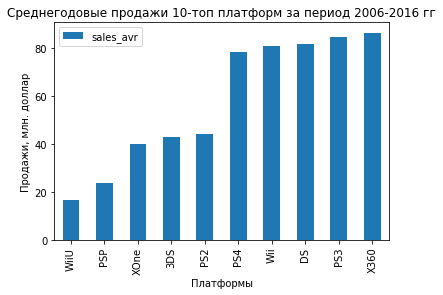

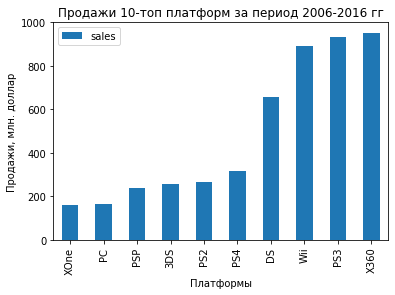

In [59]:
# создаем график среднегодовых продаж
(platform_mean2
     .query('platform in @top_platform_mean')
     .pivot_table(index='platform',values='sales_avr',aggfunc='median')
     .sort_values('sales_avr')
     .plot(kind='bar')
)
plt.xlabel('Платформы') 
plt.ylabel('Продажи, млн. доллар') 
plt.title('Среднегодовые продажи 10-топ платформ за период 2006-2016 гг')  

#  добавим для сравнение общие продажи
(df_actual
     .query('platform in @top_platform2')
     .pivot_table(index='platform',values='sales',aggfunc='sum')
     .sort_values('sales')
     .plot(kind='bar')
)
plt.xlabel('Платформы') 
plt.ylabel('Продажи, млн. доллар') 
plt.title('Продажи 10-топ платформ за период 2006-2016 гг') 


Сравнение 2-х графиков показало что сравнение суммарных продаж не совсем корректно (порядок платформ немного отличается: платформы DS и Wii поменялись местами; платформа PS4 недавно вышла на рынок - поэтому среднегодовые показатели выше) . Лидиром продаж явлеяется платформа Х360, самые низкие среднегодовые показатели у WIU, самые низкие суммарные продажи среди топ-10 у платформы XOne
Построим boxplot для того чтобы посмотреть мелианное различие у данных платформ

In [60]:
# топ платформ
top_platform_mean

Index(['X360', 'PS3', 'DS', 'Wii', 'PS4', 'PS2', '3DS', 'XOne', 'PSP', 'WiiU'], dtype='object', name='platform')

In [61]:
df_actual.query('platform in @top_platform_mean')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,year_count
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,1
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,1
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,1
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,1
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.00,-999.0,-999.0,-999,0.01,1
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,-999.0,-999.0,E,0.01,1
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-999.0,-999.0,-999,0.00,1
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-999.0,-999.0,-999,0.01,1


(0, 1)

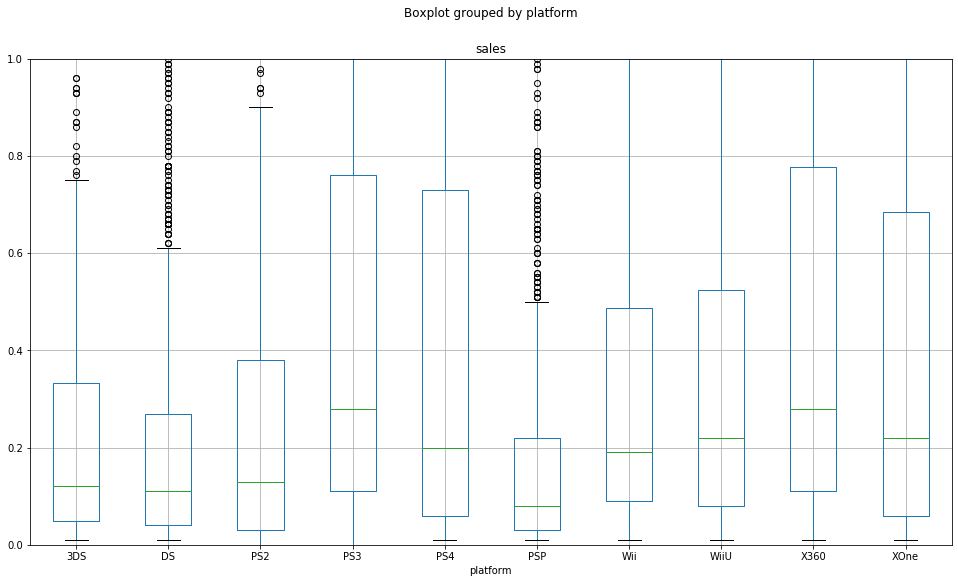

In [62]:
# строим boxplot
df_actual.query('platform in @top_platform_mean').boxplot('sales',by='platform',figsize=(16,9))
plt.ylim(0,1)

Boxplot показал иное распределение топовых позиций. Лидирами остаются платформы Х360 и PS3, затем PS4, XOne, WiiU, Wii, PS2, 3DS, PS,PSP

### ВЫВОД

Общая динамика продаж показала рост продаж с 1980 до 2008 г. С 2008 года наблюдается снижение продаж (лидирующие позиции на рынке игр заняли такие платформы как Apple и Google). В работе представлена 31 платформа; лидирующие позиции по продажам занимают X360,PS3,XOne,PS4,WiiU. 
Далее расмотрим какие жанры лидируют по продажам; влияют ли на продажи оценки пользователей и критиков.

### ВЛИЯНИЕ ОЦЕНОК ПОЛЬЗОВАТЕЛЕЙ И КРИТИКОВ НА ПРОДАЖИ

Вольмем платформу x360 и посмотрим как влияют оценки на продажи данной платформы

In [63]:
# срез данных по платформе wii и оценкам критиков
x360=df_actual.query('critic_score>=0 and platform=="X360"')

In [64]:
# разделим оценки критиков на  10 групп
x360['critic_group']=pd.cut(x360['critic_score'],10)

C:\Users\MaNi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
# сгруппируем данные по балам
x360.pivot_table(index='critic_group',values='sales',aggfunc='mean').reset_index()

,critic_group,sales
0,"(18.921, 26.9]",0.168333
1,"(26.9, 34.8]",0.236667
2,"(34.8, 42.7]",0.222727
3,"(42.7, 50.6]",0.267167
4,"(50.6, 58.5]",0.268261
5,"(58.5, 66.4]",0.472077
6,"(66.4, 74.3]",0.651941
7,"(74.3, 82.2]",0.929314
8,"(82.2, 90.1]",2.092154
9,"(90.1, 98.0]",5.448333


Представлена 100-бальная оценка критиков. В таблице наблюдается у игр платформы с более высокимо показателями реализации более высокие оценки критиков. Посмотрим диаграмму рассеяния и расчитаем коэфициент корреляции

Text(0.5, 1.0, 'Диаграма рассеяния ')

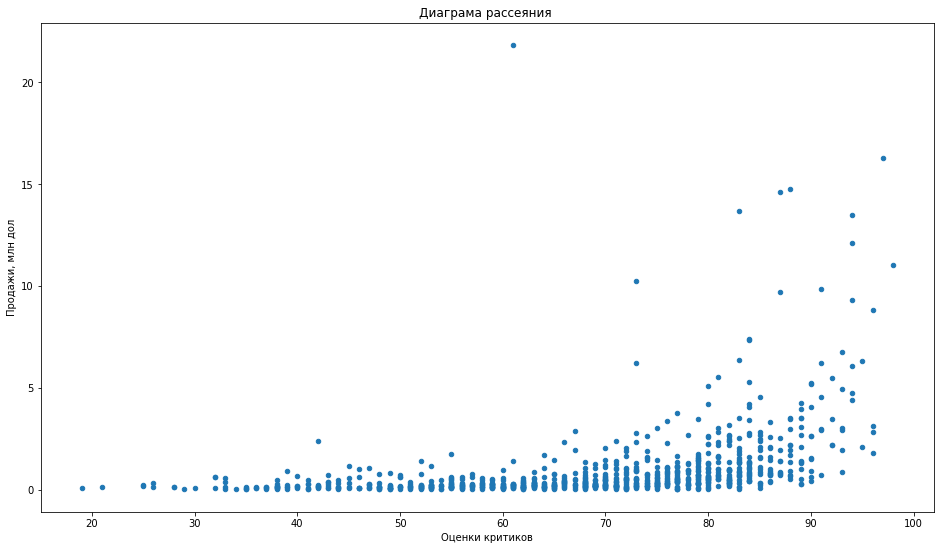

In [66]:
# диаграмма рассения
x360.plot(x='critic_score',y='sales',kind='scatter',figsize=(16,9))
plt.xlabel('Оценки критиков') 
plt.ylabel('Продажи, млн дол') 
plt.title('Диаграма рассеяния ')

In [67]:
# расчитаем коэффициент корреляции
x360['critic_score'].corr(x360['sales'])

0.39630669748604197

Зависимость между оценками критиков и продажами есть. Эту зависимость показывает как диаграмма рассеивания, так и коэффициент корреляции Т.е высокие оценки критиков предполагают увеличение продаж

##### ВЛИЯНИЕ ОЦЕНКИ ПОЛЬЗОВАТЕЛЕЙ НА ПРОДАЖИ ПЛАТФОРМЫ

In [68]:
# создаем таблицу
x360_2=df_actual.query('user_score>=0 and platform=="X360"')

In [69]:
# группируем данные
x360_2.pivot_table(index='user_score',values='sales',aggfunc='mean').reset_index()

,user_score,sales
0,0.7,0.180000
1,1.2,0.100000
2,1.3,0.095000
3,1.7,0.210000
4,2.1,0.403333
...,...,...
67,8.6,1.315455
68,8.7,1.831000
69,8.8,1.238333
70,8.9,1.972500


Также как и оценки критиков, оценки пользователей положительно влияют на динамику продаж . Рассмотрим диаграмму рассеяния и расчитаем коэффициент корреляции

Text(0.5, 1.0, 'Диаграма рассеяния ')

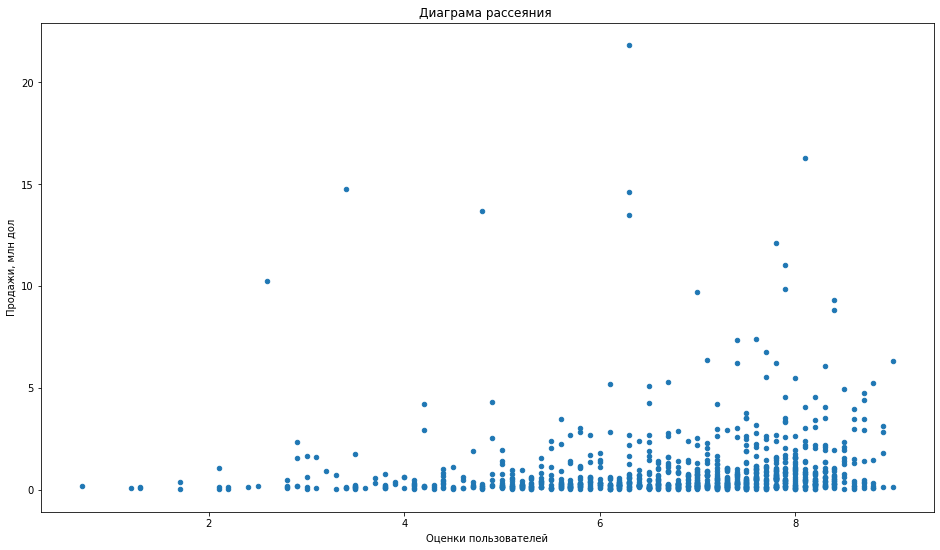

In [70]:
# диаграмма рассения
x360_2.plot(x='user_score',y='sales',kind='scatter',figsize=(16,9))
plt.xlabel('Оценки пользователей') 
plt.ylabel('Продажи, млн дол') 
plt.title('Диаграма рассеяния ')

In [71]:
# расчет коэффициента корреляции
x360_2['user_score'].corr(x360_2['sales'])

0.11576213224310153

Также как у оценки критиков, есть зависимость между оценками пользователей и продажами, но она небольшая. Т.е при планировании  продуктового портфеля для игр платформы x360_2 можно прислушиваться к оценкам критиков, пользователей. Причем оценки критико оказывают большее влияние на продажи. 

##### Посмотрим каксается данная зависимость только платформы Wii или характерна и для других платформ

In [72]:
# создаем таблицу
criticscore_influence=df_actual.query('critic_score>=0 and platform!="Wii"')

In [73]:
# разделим оценки критиков на  10 групп
criticscore_influence['critic_group']=pd.cut(criticscore_influence['critic_score'],10)

C:\Users\MaNi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
# группируем данные
criticscore_influence.pivot_table(index='critic_group',values='sales',aggfunc='mean').reset_index()

,critic_group,sales
0,"(12.915, 21.5]",0.296250
1,"(21.5, 30.0]",0.114762
2,"(30.0, 38.5]",0.160543
3,"(38.5, 47.0]",0.215370
4,"(47.0, 55.5]",0.247076
5,"(55.5, 64.0]",0.307530
6,"(64.0, 72.5]",0.414140
7,"(72.5, 81.0]",0.669333
8,"(81.0, 89.5]",1.446633
9,"(89.5, 98.0]",3.184437


Сводная таблица отражает прямую связь между продажами и оценками критиков

Text(0.5, 1.0, 'Диаграма рассеяния ')

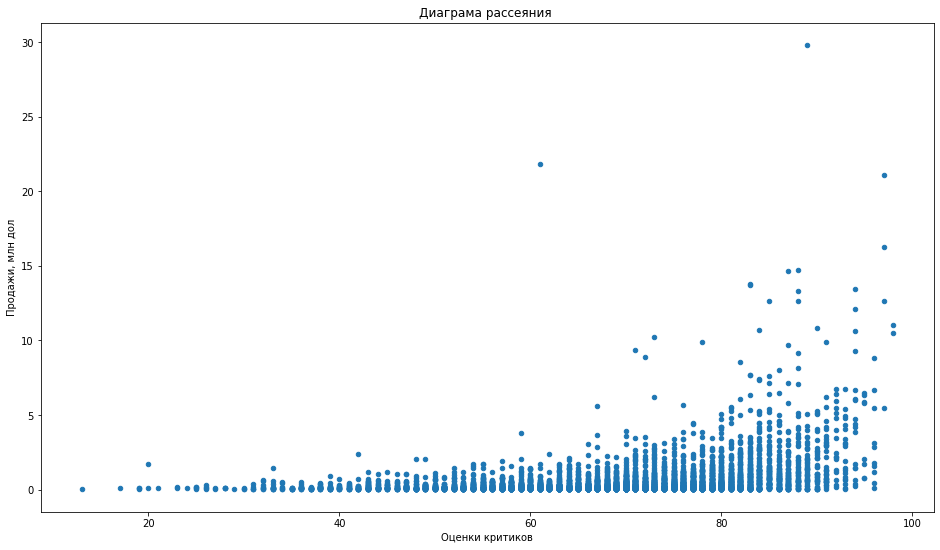

In [75]:
# диаграмма рассения
criticscore_influence.plot(x='critic_score',y='sales',kind='scatter',figsize=(16,9))
plt.xlabel('Оценки критиков') 
plt.ylabel('Продажи, млн дол') 
plt.title('Диаграма рассеяния ')

У всех остальных платформ диаграмма рассеяния показывает более устойчивую связь

In [76]:
# и расчитаем коэффициент корреляции
criticscore_influence['critic_score'].corr(criticscore_influence['sales'])

0.33452631063289373

#### Более сильную взаимосвязь оценки критиков и продаж показывает не только диаграмма рассеяния, но и коэффициент корреляции. Чем выше будет оценка критиков, тем более высокие продажи той или иной игры стоит ожидать

Посмотрим как обстоит дело с оценками  пользователей

In [77]:
# создаем таблицу
userscore_influence=df_actual.query('user_score>=0 and platform!="Wii"')

In [78]:
# группируем данные
userscore_influence.pivot_table(index='user_score',values='sales',aggfunc='mean').reset_index()

,user_score,sales
0,0.0,0.720000
1,0.2,0.110000
2,0.3,0.300000
3,0.5,0.140000
4,0.6,0.100000
...,...,...
86,9.0,1.061429
87,9.1,1.829000
88,9.2,1.210000
89,9.3,0.385556


Text(0.5, 1.0, 'Диаграма рассеяния ')

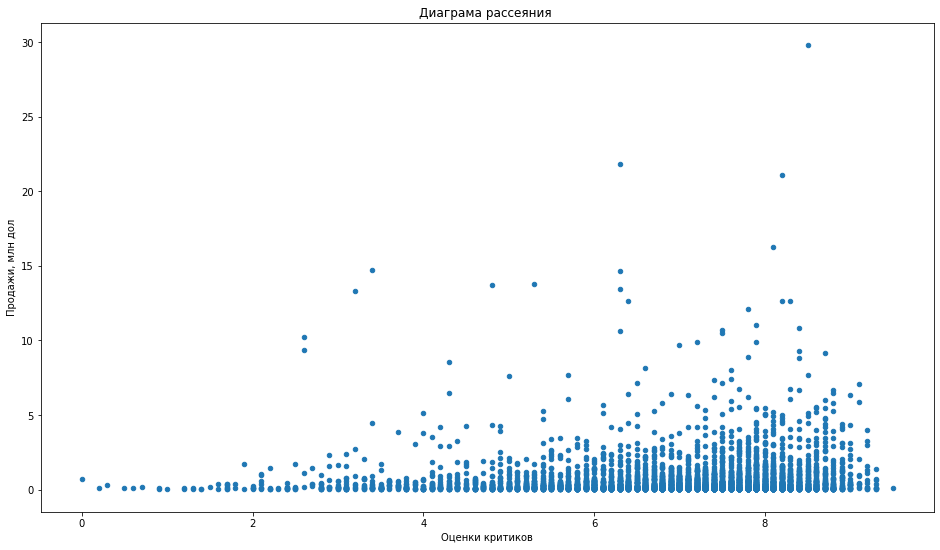

In [79]:
# диаграмма рассения
userscore_influence.plot(x='user_score',y='sales',kind='scatter',figsize=(16,9))
plt.xlabel('Оценки критиков') 
plt.ylabel('Продажи, млн дол') 
plt.title('Диаграма рассеяния ')

Сводная таблица и диаграмма рассеяния показывают совсем небольшую зависимость. 
Посмотрим коэффициент корреляции

In [80]:
# расчитаем коэффициент корреляции
userscore_influence['user_score'].corr(userscore_influence['sales'])

0.0835445530511485

Что и подтвердил коэффициент корреляции

### Вывод

Изучение зависимости оценок и продаж как отдельной платформы (Х360), так и остальных платформ показал: то что характерно для одной платформы, не обязательно распространяется на остальные. У платформы Х360 оценки крмитиков и пользователей плияют на продажи, а у остальных платформ оценки критиков влияют, а оценки пользователей практически нет. Это объясняется разным поведением потребеителей. Например, PC игроки читают форумы, специализированные инетренет источники, а игроки playstation не ориентируются на данную инфо.
Для прогнозирования продаж предпочтительнее ориентироваться не на общие показатели, а для каждой платформы расчитывать в отдельности.

## Изучим жанры игр

Text(0.5, 1.0, 'Продажи по жанрам игр за период 2006-2016 гг')

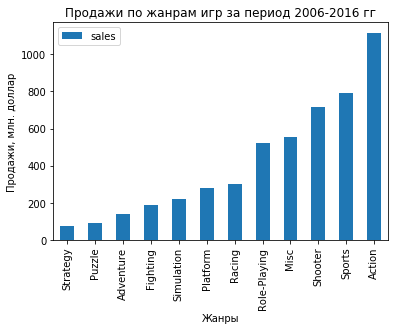

In [81]:
# посмортим жанры с самыми высокими и низкими продажами
(df_actual
     .pivot_table(index='genre',values='sales',aggfunc='sum')
     .sort_values('sales')
     .plot(kind='bar')
)
plt.xlabel('Жанры') 
plt.ylabel('Продажи, млн. доллар') 
plt.title('Продажи по жанрам игр за период 2006-2016 гг')   

Наибольшим спросом пользуются игры action и наименьшем стратегии. По продажам выделяются 3 жанра: спорт, стрелялки и action. Компании стоит добавлять в свой продуктовый портфельм больше игр данных жанров
Т.е максимум продаж стоит ожидать от игр жанра action, sports, shooter на платформах X360, PS3, PS4

Text(0.5, 1.0, 'Динамика продаж игр у разных жанров за период 2006-2016 гг ')

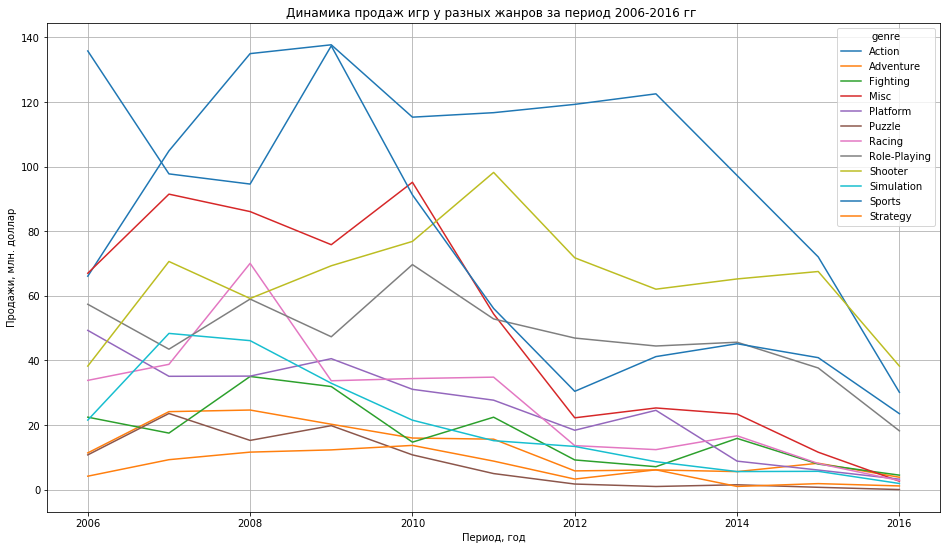

In [82]:
df_actual.pivot_table(index='year_of_release',columns='genre',values='sales',aggfunc='sum').plot(figsize=(16,9),grid=True)
plt.xlabel('Период, год') 
plt.ylabel('Продажи, млн. доллар') 
plt.title('Динамика продаж игр у разных жанров за период 2006-2016 гг ')

У игр action ,в отличии от остальных жанров , наблюдались резкий взлет продаж и резкое падение. Возможно это объясняется выходом "культовых" игр. В виду такой динамики продаж игры жанра action трудно спрогнозировать на следующий перпиод. Из  всех жанров самым прогнозируемым явлется жанры стратегия и приключения.

### Портрет пользователя каждого региона

Безусловно на рынках gamedev разных стран разные предпочтения жанров и платформ. И при формировании продуктового портфеля это необходимо учитовать. Рассмотрим каждый регион в отдельности

In [83]:
# создадим функцию для каждого региона
def user(region):
    # суммарные продажи
    print('Суммарные продажи: {:.2f} млн дол'.format(df_actual[region].sum().sum()))
    print('-------------------------------------------')
    # топ 5 платформ
    top_platform5=df_actual.pivot_table(index='platform',values=region,aggfunc='mean').sort_values(by=region,ascending=False).head(5).index
    top_platform5_avr=df_actual.query('platform in @top_platform5').pivot_table(index='platform',values=region,aggfunc='mean').reset_index()
    print(top_platform5_avr)
    print('-------------------------------------------')
    # круговая диаграмма продаж платформ
    plt.figure(figsize=(16,8))
    ax1=plt.subplot(121,aspect='equal')
    top_platform5_avr.plot(kind='pie',y=region,ax=ax1,labels=top_platform5_avr['platform'],legend=False)
    # топ 5 продаж по жанрам
    top_genre5=df_actual.pivot_table(index='genre',values=region,aggfunc='sum').sort_values(by=region,ascending=False).head(5).index
    top_genre=df_actual.query('genre in @top_genre5').pivot_table(index='genre',values=region,aggfunc='sum').reset_index()
    print(top_genre)
    print('--------------------------------------------')
    # график топовых жанров
    top_genre=df_actual.query('genre in @top_genre5').pivot_table(index='genre',values=region,aggfunc='sum').sort_values(region).plot(kind='bar')
    # рейтинг ESRB
    esrb=pd.pivot_table(df_actual[df_actual['rating']!='-999'],index='rating',values=region,aggfunc='sum').reset_index()
    print(esrb)
    # круговая диаграмма
    esrb.plot(kind='pie',y=region,labels=esrb['rating'],legend=False)

    

### СЕВЕРНАЯ АМЕРИКА

Суммарные продажи: 2386.67 млн дол
-------------------------------------------
  platform  na_sales
0      PS3  0.298721
1      PS4  0.277398
2      Wii  0.378593
3     X360  0.485041
4     XOne  0.377004
-------------------------------------------
          genre  na_sales
0        Action    530.44
1          Misc    285.06
2  Role-Playing    199.63
3       Shooter    373.13
4        Sports    396.64
--------------------------------------------
  rating  na_sales
0      E    796.98
1   E10+    315.40
2     EC      1.32
3      M    574.33
4     RP      0.00
5      T    424.14


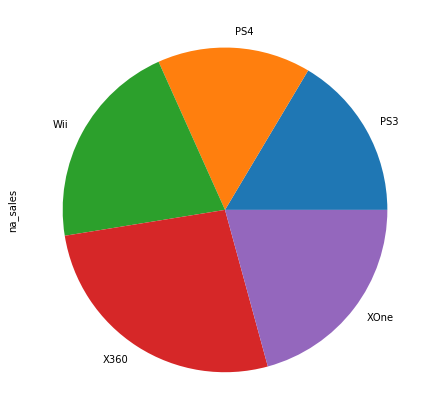

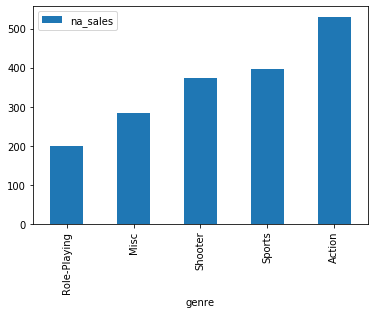

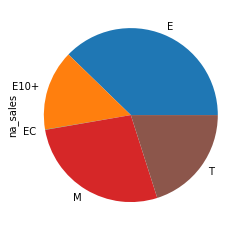

In [84]:
user('na_sales')

### ЕВРОПА

Суммарные продажи: 1496.00 млн дол
-------------------------------------------
  platform  eu_sales
0      PS3  0.250544
1      PS4  0.359923
2      Wii  0.200871
3     X360  0.220667
4     XOne  0.208866
-------------------------------------------
     genre  eu_sales
0   Action    350.70
1     Misc    146.88
2   Racing    113.39
3  Shooter    238.89
4   Sports    251.55
--------------------------------------------
  rating  eu_sales
0      E    461.09
1   E10+    173.35
2     EC      0.00
3      M    398.90
4     RP      0.03
5      T    235.44


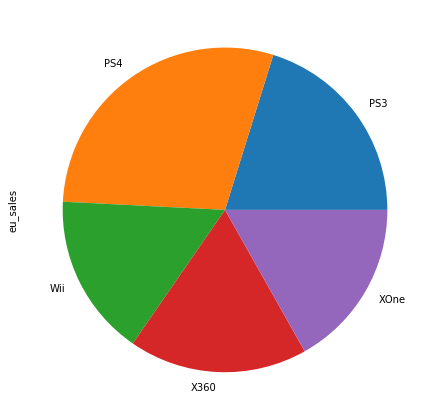

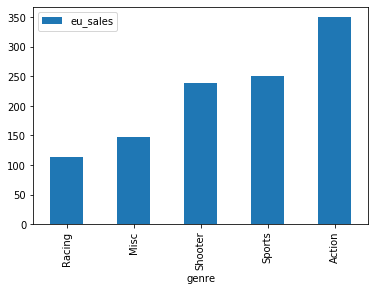

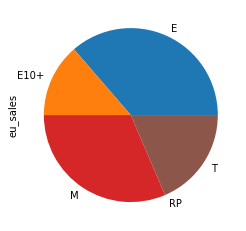

In [85]:
user('eu_sales')

### ЯПОНИЯ

Суммарные продажи: 561.31 млн дол
-------------------------------------------
  platform  jp_sales
0      3DS  0.196523
1       DS  0.071496
2      PS3  0.060804
3      PSP  0.065217
4     WiiU  0.088503
-------------------------------------------
          genre  jp_sales
0        Action    102.07
1          Misc     64.53
2      Platform     35.20
3  Role-Playing    170.38
4        Sports     48.97
--------------------------------------------
  rating  jp_sales
0      E    120.36
1   E10+     36.57
2     EC      0.00
3      M     43.79
4     RP      0.00
5      T     83.90


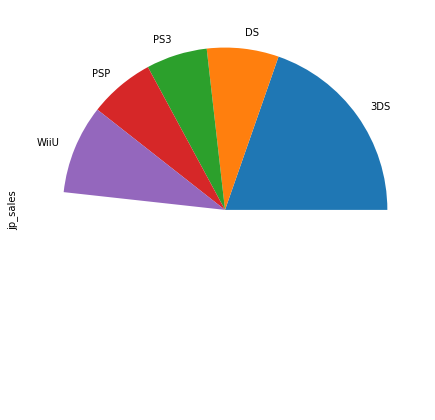

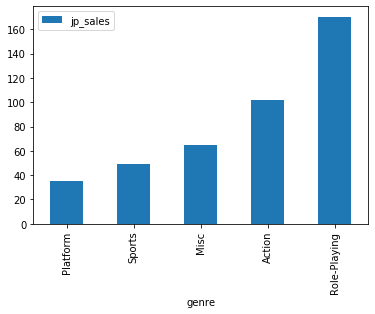

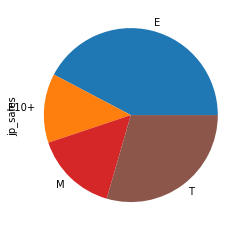

In [86]:
user('jp_sales')

### ОСТАЛЬНЫЕ СТРАНЫ

Суммарные продажи: 553.04 млн дол
-------------------------------------------
  platform  other_sales
0      PS2     0.085342
1      PS3     0.103055
2      PS4     0.123342
3      Wii     0.060428
4     X360     0.069390
-------------------------------------------
          genre  other_sales
0        Action       133.44
1          Misc        58.39
2  Role-Playing        41.77
3       Shooter        85.67
4        Sports        96.69
--------------------------------------------
  rating  other_sales
0      E       162.54
1   E10+        67.51
2     EC         0.08
3      M       140.70
4     RP         0.01
5      T       105.85


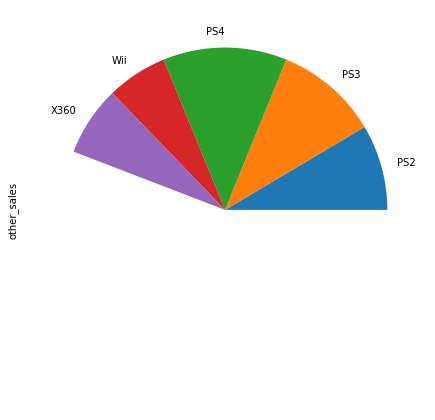

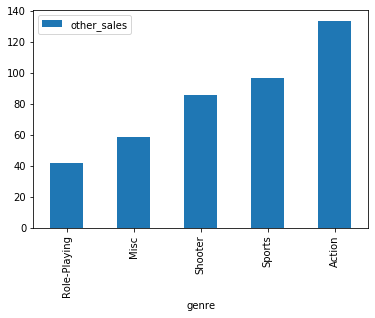

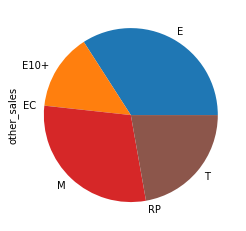

In [87]:
user('other_sales')

### ВСЕ РЕГИОНЫ

Суммарные продажи: 4997.02 млн дол
-------------------------------------------
  platform     sales
0      PS3  0.713124
1      PS4  0.801378
2      Wii  0.692986
3     X360  0.785000
4     XOne  0.645020
-------------------------------------------
          genre    sales
0        Action  1116.65
1          Misc   554.86
2  Role-Playing   522.40
3       Shooter   717.04
4        Sports   793.85
--------------------------------------------
  rating    sales
0      E  1540.97
1   E10+   592.83
2     EC     1.40
3      M  1157.72
4     RP     0.04
5      T   849.33


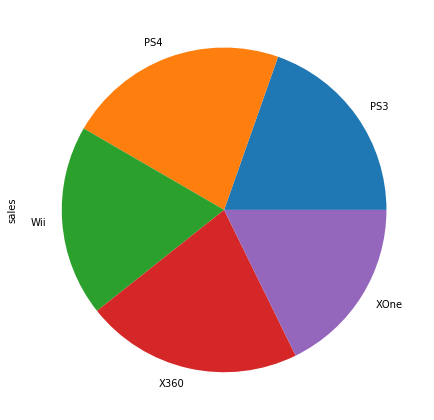

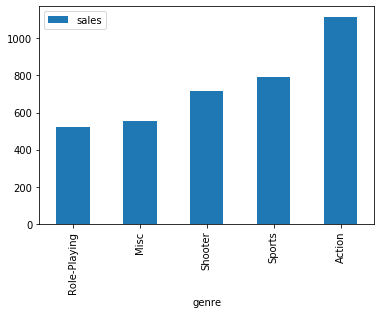

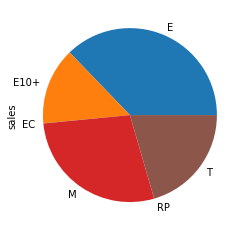

In [88]:
user('sales')

### ВЫВОД

Хорошо иметь анализ продаж в целом, но не менее важно рассматривать продажи по каждому региону в отдельности. Большая чать продаж приходится на рынон Северной Америки, затем Европа и Япония.
В Северной Америке лидирующую позицию имеет платформа Х360, затем Xone и Wii. По жанрам : 1.Shooter, 2. action, 3. sports. Игры для всех (Е) и для взрослых (М)
В Европе лидеры следующие платформы: 1.PS4 ,2.PS3, 3.Wii. Предпочитают такие игры как 1.Sports, 2.shooter, 3.action. Так же как и в Северной Америке в основном это игры для всех и для взрослых
В Японии большая часть продаж приходится на платформу 3DS; жанры - 1.role'playing, 2.platform, 3.music. И в основном это игры для всех
В остальных регионах нет явно лидирующей платформы (PS2, PS4, PS3). Жанры : 1. sports, 2.shooter, 3.action. 

### ГИПОТЕЗА 1

Теперь проверим 2 гипотезы: одинаковые или нет пользовательские рейтинги у разных платформ и у разных жанров. 

Н0=cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1=cредние пользовательские рейтинги платформ Xbox One и PC разные.

In [89]:
# срез данных по оценкам пользователей больше 0
platform_actual=df_actual.query('user_score>=0')

In [90]:
print('средний пользовательский рейтинг',platform_actual['user_score'].mean())

средний пользовательский рейтинг 6.8443794147325745


In [91]:
xbox=platform_actual[platform_actual['platform']=='XOne']

In [92]:
PC=platform_actual[platform_actual['platform']=='PC']

In [93]:
print('средний пользовательский рейтинг платформы Xone: ', xbox['user_score'].mean())

средний пользовательский рейтинг платформы Xone:  6.52142857142857


In [94]:
print('средний пользовательский рейтинг платформы PC: ', PC['user_score'].mean())

средний пользовательский рейтинг платформы PC:  6.830081300813019


In [95]:
alpha = .05
results =st.ttest_ind(
    xbox['user_score'], 
    PC['user_score'])
print('p-значение:',results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.014354742043413306
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу: пользовательские рейтинги зависят от платформы

### ГИПОТЕЗА 2

Н0=Средние пользовательские рейтинги жанров Action и Sports  одинаковые.

Н1=Средние пользовательские рейтинги жанров Action и Sports разные.

In [96]:
action=platform_actual[platform_actual['genre']=='Action']

In [97]:
sports=platform_actual[platform_actual['genre']=='Sports']

In [98]:
print('средний пользовательский рейтинг жанра action: ', action['user_score'].mean())

средний пользовательский рейтинг жанра action:  6.878625377643504


In [99]:
print('средний пользовательский рейтинг жанра sports: ', sports['user_score'].mean())

средний пользовательский рейтинг жанра sports:  6.4164201183431935


In [100]:
alpha = .05
results =st.ttest_ind(
    action['user_score'], 
    sports['user_score'])
print('p-значение:',results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.493183815903372e-11
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу: пользовательские рейтинги зависят от жанра игры

Самая первая компьютервная игра появиласть в 1940 году. С тех пор изменились технологии, визуализация игр. Безусловно не стоит анализировать компьютерные игры 80-х годов (наврядли кто нибудь сейчас играет в игры при помощи магнитофона). До 2008 года наблюдается повышающаяся динамика производства игр, а после 2009 года снижение. Такая динамика объясняестя приходом на рынок и популяризацией таких платформ как Apple и Google, которые заняли лидидующие позиции на рынке игр

 В 2006 появляются и растут в продажах новые платформы и ухоят с рынка некоторые платформы. Для дальнейшей обработки данных будем рассматривать период с 2006 - 2016 гг.

Минимальный срок за который появляется и уходит с рынка платформа -  1 год (скорее всего это новая платформа) и максимальный срок - 26 лет. В среднем период от появления платформы до ухода с рынка занимает 7 лет, чаще всего 12 лет

Как видно из предыдущих графиков, все платформы по продажам достигали своего пика в разные периоды. В настоящее время все анализируемые платформы находятся на стадии спада

Лидиром продаж явлеяется платформа Х360, самые низкие среднегодовые показатели у WIU, самые низкие суммарные продажи среди топ-10 у платформы XOne
Boxplot показал иное распределение топовых позиций. Лидирами остаются платформы Х360 и PS3, затем PS4, XOne, WiiU, Wii, PS2, 3DS, PS,PSP

  У продаж есть зависимость от оценок критиков и пользователей. Т.е при планировании  продуктового портфеля для игр можно прислушиваться к оценкам критиков, пользователей.
  Изучение зависимости оценок и продаж как отдельной платформы (Х360), так и остальных платформ показал: то что характерно для одной платформы, не обязательно распространяется на остальные. У платформы Х360 оценки крмитиков и пользователей плияют на продажи, а у остальных платформ оценки критиков влияют, а оценки пользователей практически нет. Это объясняется разным поведением потребеителей. Например, PC игроки читают форумы, специализированные инетренет источники, а игроки playstation не ориентируются на данную инфо.
Для прогнозирования продаж предпочтительнее ориентироваться не на общие показатели, а для каждой платформы расчитывать в отдельности.

Наибольшим спросом пользуются игры action и наименьшем стратегии. По продажам выделяются 3 жанра: спорт, стрелялки и action. Компании стоит добавлять в свой продуктовый портфельм больше игр данных жанров
Т.е максимум продаж стоит ожидать от игр жанра action, sports, shooter на платформах X360, PS3, PS4

Хорошо иметь анализ продаж в целом, но не менее важно рассматривать продажи по каждому региону в отдельности.
Большая чать продаж приходится на рынон Северной Америки, затем Европа и Япония.
В Северной Америке лидирующую позицию имеет платформа Х360, затем Xone и Wii. По жанрам : 1.Shooter, 2. action, 3. sports. Игры для всех (Е) и для взрослых (М)
В Европе лидеры следующие платформы: 1.PS4 ,2.PS3, 3.Wii. Предпочитают такие игры как 1.Sports, 2.shooter, 3.action. Так же как и в Северной Америке в основном это игры для всех и для взрослых
В Японии большая часть продаж приходится на платформу 3DS; жанры - 1.role'playing, 2.platform, 3.music. И в основном это игры для всех
В остальных регионах нет явно лидирующей платформы (PS2, PS4, PS3). Жанры : 1. sports, 2.shooter, 3.action. 

Проверка гипотез показала что пользователи по разному ставят оценки для разных платформ и для разных жанров
